In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
import plotly.express as px


In [13]:
df = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\air- quality in nairobi.csv', sep=';')
print(df.shape)
df.head(40)


(165156, 8)


,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
0,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.071983+00:00,humidity,65.80
1,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.071983+00:00,temperature,21.10
2,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.111462+00:00,P2,4.40
3,40,SDS011,7,-1.298,36.791,2018-04-01T00:02:07.111462+00:00,P1,7.80
4,43,SDS011,20,-1.253,36.854,2018-04-01T00:03:56.860816+00:00,humidity,76.30
5,43,SDS011,20,-1.253,36.854,2018-04-01T00:03:56.860816+00:00,temperature,19.50
6,40,SDS011,7,-1.298,36.791,2018-04-01T00:04:36.364175+00:00,P2,4.43
7,40,SDS011,7,-1.298,36.791,2018-04-01T00:04:36.364175+00:00,P1,6.83
8,40,SDS011,7,-1.298,36.791,2018-04-01T00:07:18.801040+00:00,P2,4.50
9,40,SDS011,7,-1.298,36.791,2018-04-01T00:07:18.801040+00:00,P1,7.87


**HOW MANY TIMES EACH SENSOR WAS USED IN THE DATA**

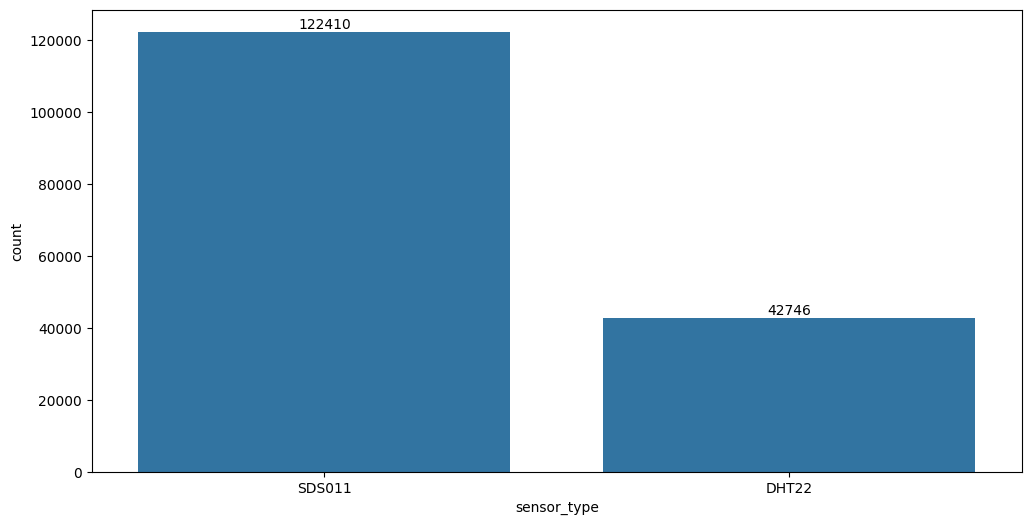

In [3]:
plt.figure(figsize=(12, 6))
graph = sns.countplot(x='sensor_type', data = df, order = df['sensor_type'].value_counts().index)
for x in graph.containers:
    graph.bar_label(x)
plt.show()


**COUNT OF TESTING CARRIED OUT IN EACH LOCATION**

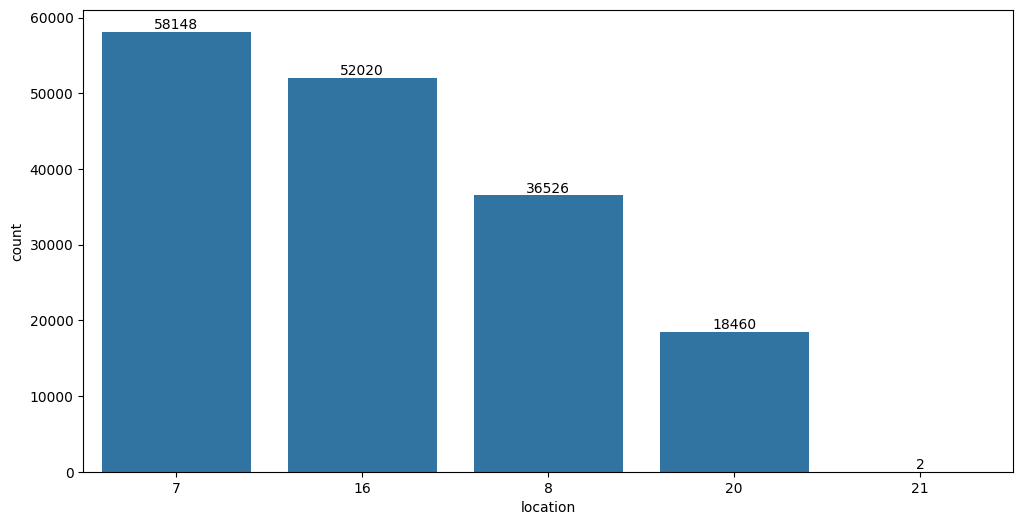

In [4]:
plt.figure(figsize=(12, 6))
graph = sns.countplot(x='location', data = df, order = df['location'].value_counts().index)
for x in graph.containers:
    graph.bar_label(x)
plt.show()


**COUNT OF EACH TEST CARRIED OUT**

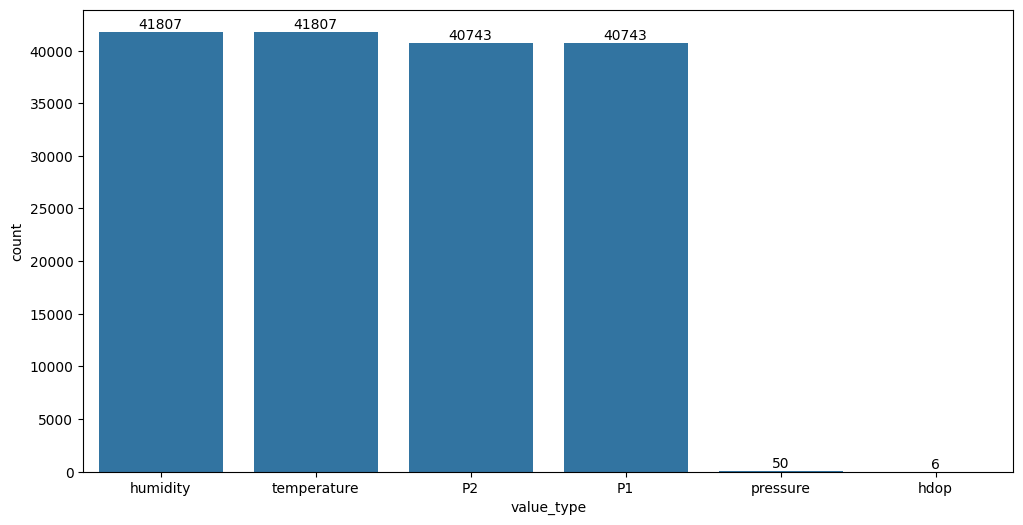

In [5]:
plt.figure(figsize=(12, 6))
graph = sns.countplot(x='value_type', data = df, order = df['value_type'].value_counts().index)
for x in graph.containers:
    graph.bar_label(x)
plt.show()


**WRANGLE FUNCTION OF ALL THE CHANGES MADE IN THE DATA**

In [32]:
def wrangle(filepath, sep):
    df = pd.read_csv(filepath, sep=';')

# we will be working with the location with the most data [location 7] and measurement of [P2]
    df = df[df['location'] == 7][df['value_type'] == 'P2']

# we will be working with only timestamp and p2 values
    df = df.pivot_table(index='timestamp', columns='value_type', values = 'value')


# converting the timestamp into a datetime dtype
    df.reset_index(inplace=True)
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')   


# converting the timestamp to africa/nairobi time zone
    df.set_index('timestamp', inplace=True)
    df.index = df.index.tz_convert('Africa/Nairobi')

# resampling the data to 1hour intervals and illing the null values with forward fill
    df = df['P2'].resample('1H').mean().fillna(method='ffill').to_frame()

# creating a new column as our predictor variable [Time Lag 1]
    df['P2.L1'] = df['P2'].shift(1)

# dropping the null values
    df.dropna(inplace=True)
    return df


**VIEWING OUR DATA**

In [33]:
df = wrangle(r'C:\Users\USER\Desktop\PROJECTS\air- quality in nairobi.csv', sep=';')
print(df.shape)
df.head(40)


(719, 2)


C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3439926712.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['location'] == 7][df['value_type'] == 'P2']
C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3439926712.py:21: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df['P2'].resample('1H').mean().fillna(method='ffill').to_frame()
C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3439926712.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df['P2'].resample('1H').mean().fillna(method='ffill').to_frame()


,P2,P2.L1
timestamp,,
2018-04-01 04:00:00+03:00,4.125000,4.310455
2018-04-01 05:00:00+03:00,4.057273,4.125000
2018-04-01 06:00:00+03:00,4.027222,4.057273
2018-04-01 07:00:00+03:00,3.731364,4.027222
2018-04-01 08:00:00+03:00,3.808000,3.731364
2018-04-01 09:00:00+03:00,3.576667,3.808000
2018-04-01 10:00:00+03:00,4.022174,3.576667
2018-04-01 11:00:00+03:00,5.486316,4.022174
2018-04-01 12:00:00+03:00,4.973043,5.486316


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2018-04-01 04:00:00+03:00 to 2018-05-01 02:00:00+03:00
Freq: h
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P2      719 non-null    float64
 1   P2.L1   719 non-null    float64
dtypes: float64(2)
memory usage: 16.9 KB


In [22]:
df.describe()


,P2,P2.L1
count,719.000000,719.000000
mean,3.809953,3.813972
std,2.785856,2.784488
min,0.735000,0.735000
25%,1.882500,1.886354
50%,3.164348,3.167500
75%,4.518390,4.518390
max,18.818636,18.818636


**SHOWING THE OUTLIERS IN THE DATA**

Text(0.5, 1.0, 'Box Plot of P2')

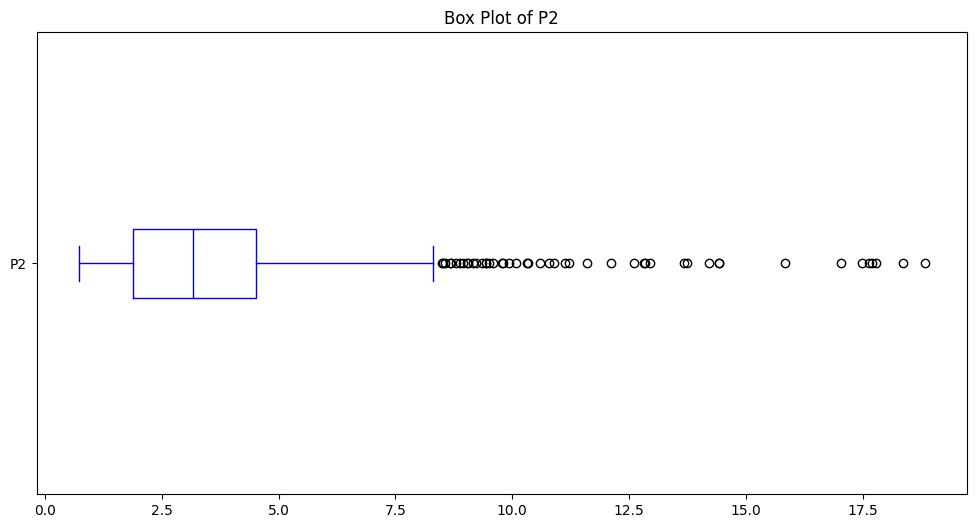

In [23]:
df['P2'].plot(kind='box', vert=False, figsize=(12, 6), color='blue')
plt.title('Box Plot of P2')


**CREATE A TIME SERIES PLOT OF P2 READINGS**

Text(0, 0.5, 'P2 Readings')

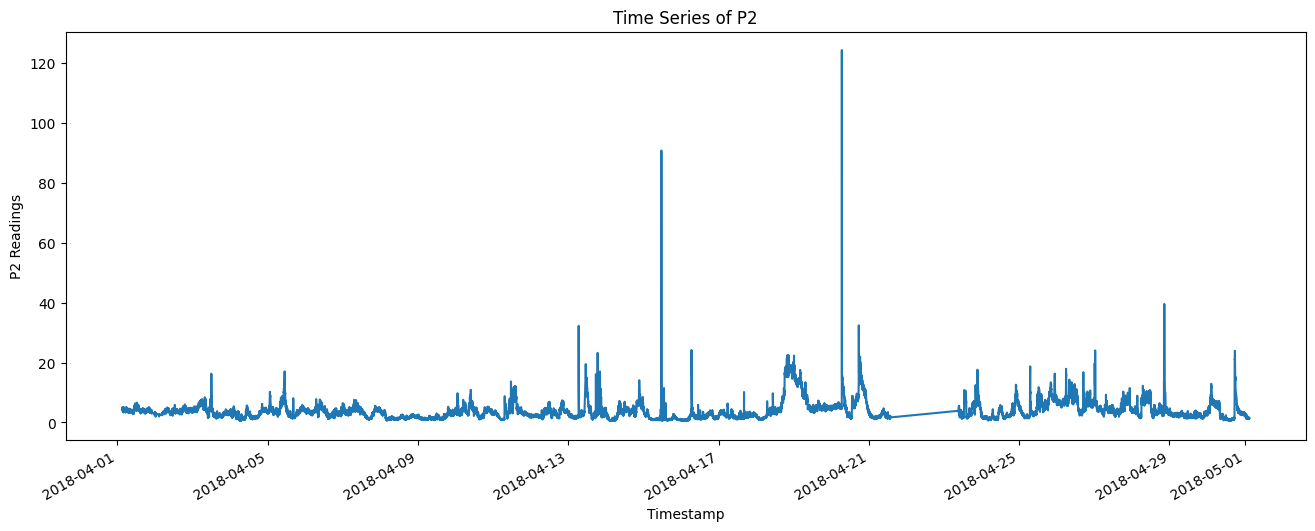

In [18]:
fig, ax = plt.subplots(figsize=(16, 6))
df['P2'].plot(ax=ax)
plt.title('Time Series of P2')
plt.xlabel('Timestamp')
plt.ylabel('P2 Readings')


**CHANGING OUR READINGS TO ONE HOUR INTERVAL TO SEE THE AVERAGE READINGS**

In [24]:
df['P2'].resample('1H').mean()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2018-04-01 04:00:00+03:00 to 2018-05-01 02:00:00+03:00
Freq: h
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P2      719 non-null    float64
 1   P2.L1   719 non-null    float64
dtypes: float64(2)
memory usage: 16.9 KB
None


C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3158860786.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['P2'].resample('1H').mean()


**BEFORE FILLING WE CAN SEE THERES A SPACE IN BETWEEEN THE DATA**

timestamp
2018-04-01 03:00:00+03:00    4.306190
2018-04-01 04:00:00+03:00    4.125000
2018-04-01 05:00:00+03:00    4.057273
2018-04-01 06:00:00+03:00    4.027222
2018-04-01 07:00:00+03:00    3.731364
Freq: h, Name: P2, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_7576\3303963016.py:1: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\USER\AppData\Local\Temp\ipykernel_7576\3303963016.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



<Axes: xlabel='timestamp'>

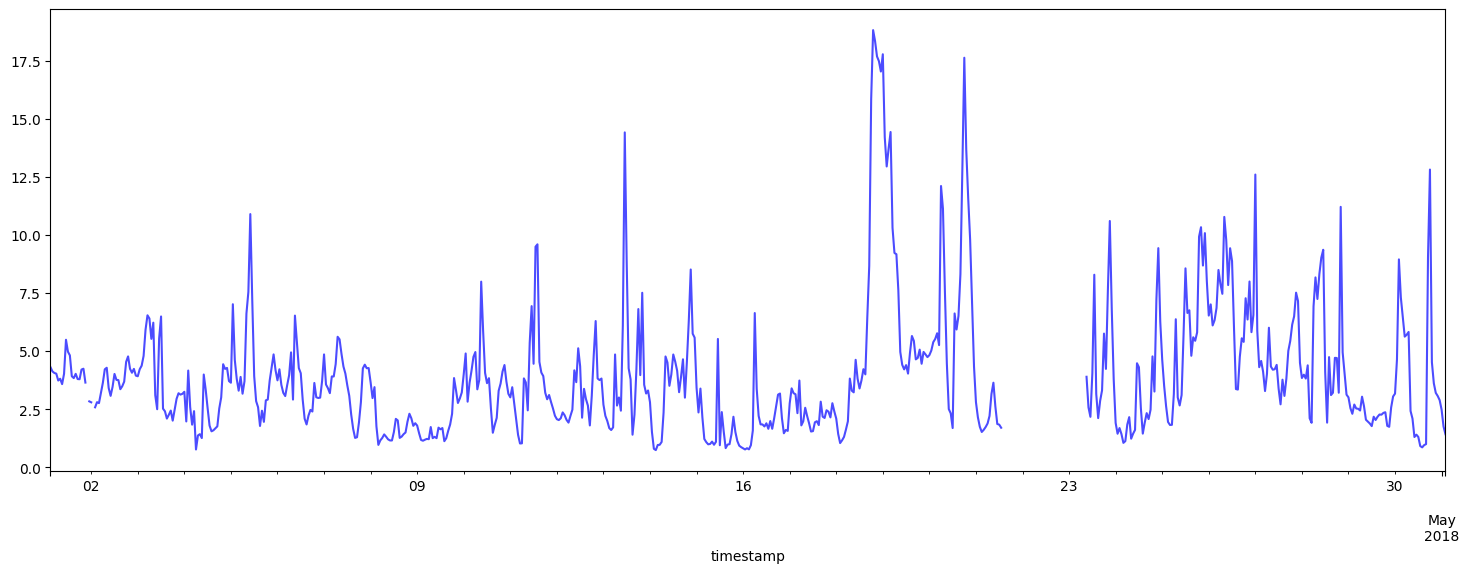

In [ ]:
print(df['P2'].resample('1H').mean().head())
df['P2'].resample('1H').mean().plot(figsize=(18, 6), color='blue', alpha=0.7)


**OUR DATA HAS NULL VALUES AFTER RESAMPLING TEM TO 1HOUR INTERVAL SO WE NEED TO FILL THE VALUES BACK....BUT BECAUSE THIS IS A TIME SERIES WE CANT USE MEAN OR MODE TO FILL THE NULL VALUES**
**SO WE WILL USE FORWARD FILL TO FILL IT UP**

In [ ]:
print(df['P2'].resample('1H').mean().isnull().sum())
df['P2'].resample('1H').mean().fillna(method='ffill').isnull().sum()


0


C:\Users\USER\AppData\Local\Temp\ipykernel_14992\1114731970.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  print(df['P2'].resample('30T').mean().isnull().sum())
C:\Users\USER\AppData\Local\Temp\ipykernel_14992\1114731970.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['P2'].resample('30T').mean().fillna(method='ffill').isnull().sum()
C:\Users\USER\AppData\Local\Temp\ipykernel_14992\1114731970.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['P2'].resample('30T').mean().fillna(method='ffill').isnull().sum()


0

**AFTER FILLING THE MISSING VALUES WITH FORWARD FILL**

C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3396284435.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['P2'].resample('1H').mean().fillna(method='ffill').plot(figsize=(18, 6), color='blue', alpha=0.7)
C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3396284435.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['P2'].resample('1H').mean().fillna(method='ffill').plot(figsize=(18, 6), color='blue', alpha=0.7)


<Axes: xlabel='timestamp'>

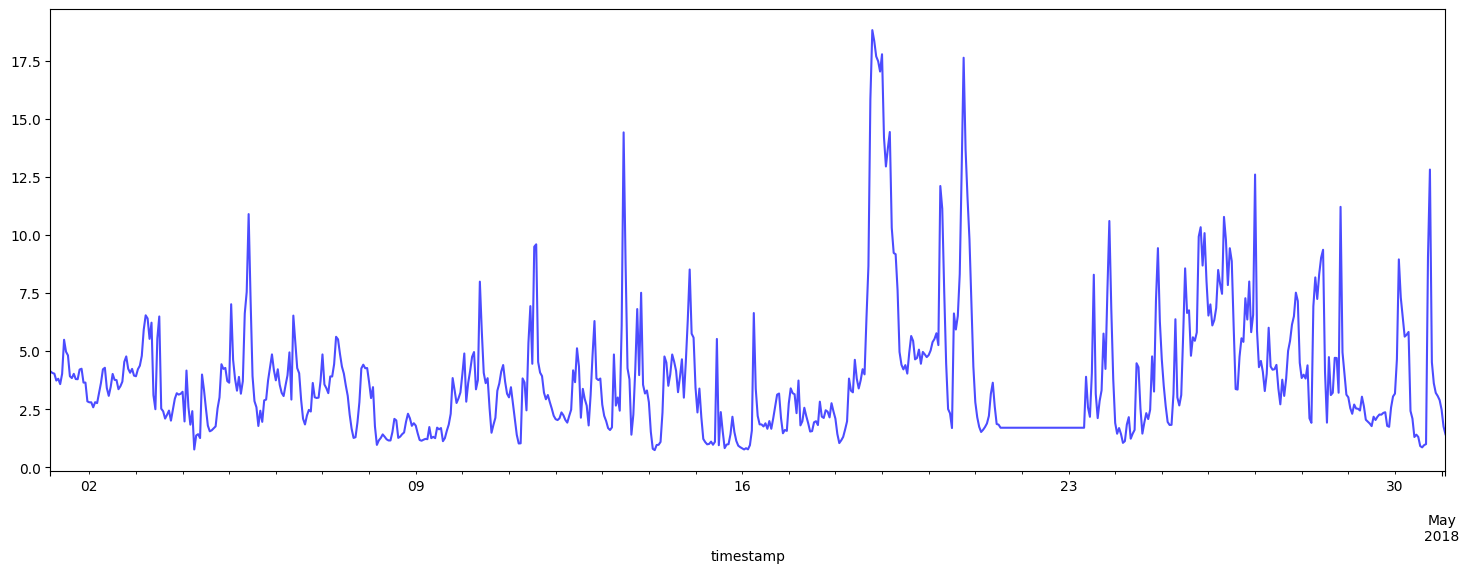

In [25]:
df['P2'].resample('1H').mean().fillna(method='ffill').plot(figsize=(18, 6), color='blue', alpha=0.7)


**ASSIGNING THE RESAMPLED DATA TO OUR DATAFRAME**

In [30]:
df = df['P2'].resample('1H').mean().fillna(method='ffill').to_frame()


C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3280023280.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df['P2'].resample('1H').mean().fillna(method='ffill').to_frame()
C:\Users\USER\AppData\Local\Temp\ipykernel_6724\3280023280.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df['P2'].resample('1H').mean().fillna(method='ffill').to_frame()


**WEEKLY READING VISUALIZATION....THERE'S 168 HOURS IN A WEEK...VISUALIZING THE AIR QUALITY FOR WEEK**

<Axes: title={'center': 'Weekly Rolling Average'}, xlabel='timestamp', ylabel='PM2.5 Readings'>

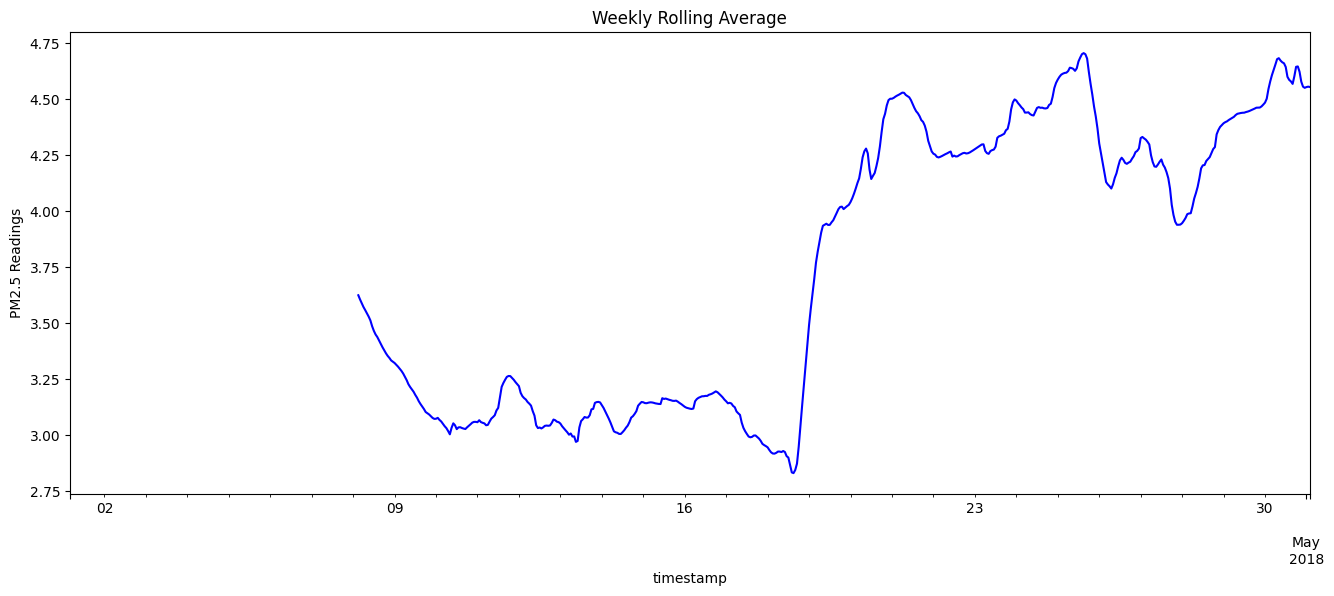

In [27]:
fig, ax = plt.subplots(figsize=(16, 6))
df['P2'].rolling(168).mean().plot(ax=ax, color='blue',ylabel='PM2.5 Readings', title='Weekly Rolling Average')


**THIS SHOWS OUR READING WILL START 167 HOURS INTO OUR DATA BECAUSE THERE'S NOT ENOUGH WINDOW TO CALCULATE THE AVERAGE...IF WE ARE TO CALCULATE THE AVERAGE READING PER WEEK(168 HOURS IN A WEEK)**

In [28]:
print(df['P2'].rolling(168).mean().isnull().sum())
print(df['P2'].rolling(168).mean().head())
print(print(df['P2'].rolling(168).mean().tail()))


167
timestamp
2018-04-01 04:00:00+03:00   NaN
2018-04-01 05:00:00+03:00   NaN
2018-04-01 06:00:00+03:00   NaN
2018-04-01 07:00:00+03:00   NaN
2018-04-01 08:00:00+03:00   NaN
Freq: h, Name: P2, dtype: float64
timestamp
2018-04-30 22:00:00+03:00    4.554741
2018-04-30 23:00:00+03:00    4.549362
2018-05-01 00:00:00+03:00    4.552773
2018-05-01 01:00:00+03:00    4.554623
2018-05-01 02:00:00+03:00    4.553048
Freq: h, Name: P2, dtype: float64
None


In [34]:
df.head(40)


,P2,P2.L1
timestamp,,
2018-04-01 04:00:00+03:00,4.125000,4.310455
2018-04-01 05:00:00+03:00,4.057273,4.125000
2018-04-01 06:00:00+03:00,4.027222,4.057273
2018-04-01 07:00:00+03:00,3.731364,4.027222
2018-04-01 08:00:00+03:00,3.808000,3.731364
2018-04-01 09:00:00+03:00,3.576667,3.808000
2018-04-01 10:00:00+03:00,4.022174,3.576667
2018-04-01 11:00:00+03:00,5.486316,4.022174
2018-04-01 12:00:00+03:00,4.973043,5.486316


**CHECKING FOR CORRELATION BETWEEN P2.LI AND P2....SEEMS THERE'S A GOOD CORRELATION BETWEEN THEM**

In [35]:
df.corr()


,P2,P2.L1
P2,1.000000,0.839441
P2.L1,0.839441,1.000000


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719 entries, 2018-04-01 04:00:00+03:00 to 2018-05-01 02:00:00+03:00
Freq: h
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P2      719 non-null    float64
 1   P2.L1   719 non-null    float64
dtypes: float64(2)
memory usage: 16.9 KB


**PLOTTING THE LINE OF BEST FIT...RELATIONSHIP BTW P2 AND P2 LAG**

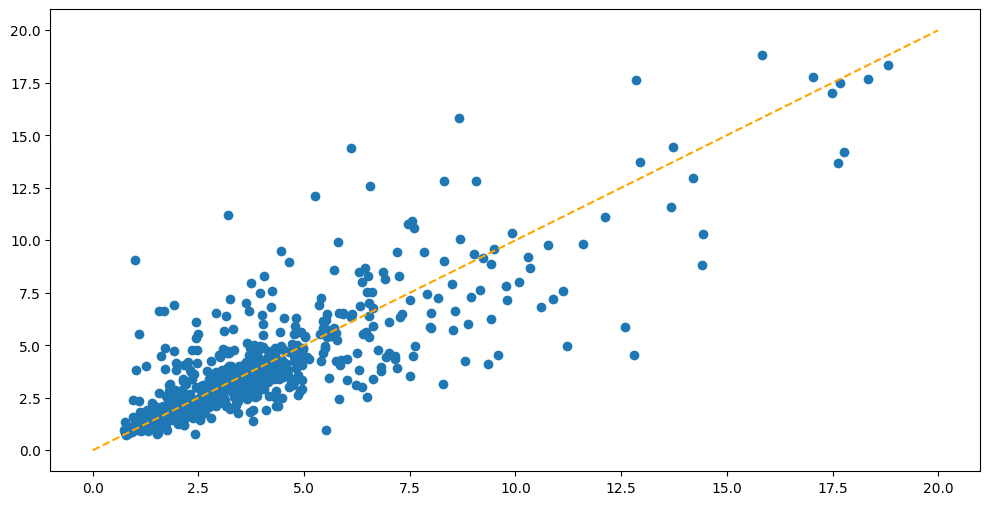

In [37]:
plt.figure(figsize=(12, 6))
plt.scatter(df['P2.L1'], df['P2'])
plt.plot([0.0, 20.0], [.00, 20.0], linestyle='--', color='orange')
plt.show()


**SPLITTING THE DATA**

In [38]:
target = 'P2'
Y = df[target]
X = df.drop(columns=target)
print(Y.shape)
print(X.shape)


(719,)
(719, 1)


**WE CANT USE THE TRAIN_TEST_SPLIT BECAUSE WE CANT USE TO FUTURE TO PREDICT THE PAST IN A TIME SERIES ANALYSIS WE CAN ONLY SPLIT THE DATA FROM THE PREVIOUS TO THE FUTURE ROW BY ROW**

In [39]:
cutoff = int(len(X) * 0.8) #80% train, 20% test
X_train = X.iloc[:cutoff] #80% of the data
X_test = X.iloc[cutoff:]#20% of the data
Y_train = Y.iloc[:cutoff] #80% of the data 
Y_test = Y.iloc[cutoff:] #20% of the data
len(X_train) + len(X_test) == len(X)


True

**GETTING THE AVERAGE OF Y_TRAIN AND THE MEAN_ABSOLUTE_ERROR**

In [40]:
Y_mean = Y.mean()
Y_pred_baseline = [Y_mean] * len(Y_train)
print('Baseline MAE:', mean_absolute_error(Y_train, Y_pred_baseline))
print(Y_pred_baseline[:5])
print('MEAN_PM2.5 READING:', Y_mean)


Baseline MAE: 1.841118611077325
[3.8099525236022096, 3.8099525236022096, 3.8099525236022096, 3.8099525236022096, 3.8099525236022096]
MEAN_PM2.5 READING: 3.8099525236022096


**INSTANTIATE THE MODEL**

**DUE TO LOW DATA AFTER FILTERING OUR TRAIN AND TEST SCORE CSNT BE SATISFYING BUT WITH ENOUGH DATA TO WORK WITH AM SURE OUR SCORE WILL NORMALIZE**

In [41]:
model = LinearRegression()
model.fit(X_train, Y_train)
mae_train = mean_absolute_error(Y_train, model.predict(X_train))
print('Train MAE:', mae_train)
mae_test = mean_absolute_error(Y_test, model.predict(X_test))
print('Test MAE:', mae_test)
r2_train = model.score(X_train, Y_train)
print('Train R2:', r2_train)
r2_test = model.score(X_test, Y_test)
print('Test R2:', r2_test)


Train MAE: 0.8467907634204589
Test MAE: 1.2247597826283656
Train R2: 0.7497802100985015
Test R2: 0.45604006482021975


In [42]:
coefficient = model.coef_.round(2)
intercept = model.intercept_.round(2)
print('Coefficient:', coefficient)
print('Intercept:', intercept)


Coefficient: [0.87]
Intercept: 0.48


**CREATING A DATAFRAME OF Y_PRED_TEST WITH COLUMS Y_TEST AND Y_PRED**


In [43]:
df_pred_test = pd.DataFrame({
           'y_test':Y_test,
           'y_pred':model.predict(X_test)

})
df_pred_test


,y_test,y_pred
timestamp,,
2018-04-25 03:00:00+03:00,1.948261,2.753110
2018-04-25 04:00:00+03:00,1.818750,2.162411
2018-04-25 05:00:00+03:00,1.823043,2.050264
2018-04-25 06:00:00+03:00,3.152500,2.053982
2018-04-25 07:00:00+03:00,6.370417,3.205198
...,...,...
2018-04-30 22:00:00+03:00,3.065652,3.246691
2018-04-30 23:00:00+03:00,2.887083,3.129994
2018-05-01 00:00:00+03:00,2.479167,2.975366


**A LINE PLOT OF OUR Y_TEST AGAINST THE Y_PREDICTION**

In [44]:

fig = px.line(df_pred_test, labels={'values':'P2'})
fig.show()
